In [ ]:
!pip install feature-engine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nome =["Idette","Aura","Else","Justinian","Arin","Emily","Celine","Lilia","Ibrahim","Brigid","Jerry","Sheille","Winna","Laryssa","De witt","Killy" ,"Marylin","Andee","Arne","Zachariah","Marseile","Mariane","Judity","Amaury"]
idade =[75,42,50,61,77,35,84,31,84,64,54,67,69,22,63,82,51,63,56,87,32,65,54,53]
saldo = [9734.05,12517.09,6304.24,11118.21,9542.27,2964.03,13232.54,11684.21,4919.49,5293.05,8847.02,1789.03,11113.87,11665.19,2432.18,11626.03,10038.05,
        1690.01,6409.31,13546.88,1298.90,1200.00,16000.00,5000.00]
len(nome), len(idade),len(saldo)


(24, 24, 24)

In [ ]:
dataframe= pd.DataFrame({"nome":nome,"idade":idade,"saldo":saldo})

In [ ]:
dataframe.head()

,nome,idade,saldo
0,Idette,75,9734.05
1,Aura,42,12517.09
2,Else,50,6304.24
3,Justinian,61,11118.21
4,Arin,77,9542.27


In [ ]:
minimo = int(np.ceil(dataframe["saldo"].min()))
maximo = int(np.floor(dataframe["saldo"].max()))

In [ ]:
print(f"Valor mínimo da coluna saldo: {minimo}\n Valor máximo da coluna saldo: {maximo}")

Valor mínimo da coluna saldo: 1200.0
 Valor máximo da coluna saldo: 16000.0


In [ ]:
largura = int((maximo-minimo)/4)

In [ ]:
print(f"Largura do intervalo: {largura}")

Largura do intervalo: 3700.0


In [ ]:
intervalos = [i for i in range(minimo,maximo+largura,largura)]

In [ ]:
print(f"Intervalos calculados: {intervalos}")

Intervalos calculados: [1200, 4900, 8600, 12300, 16000]


In [ ]:
dataframe["saldo_discretizado"] = pd.cut(dataframe["saldo"],bins=intervalos,include_lowest=True)

In [ ]:
dataframe.head()

,nome,idade,saldo,saldo_discretizado
0,Idette,75,9734.05,"(8600.0, 12300.0]"
1,Aura,42,12517.09,"(12300.0, 16000.0]"
2,Else,50,6304.24,"(4900.0, 8600.0]"
3,Justinian,61,11118.21,"(8600.0, 12300.0]"
4,Arin,77,9542.27,"(8600.0, 12300.0]"


Text(0, 0.5, 'Número de observações em cada intervalo')

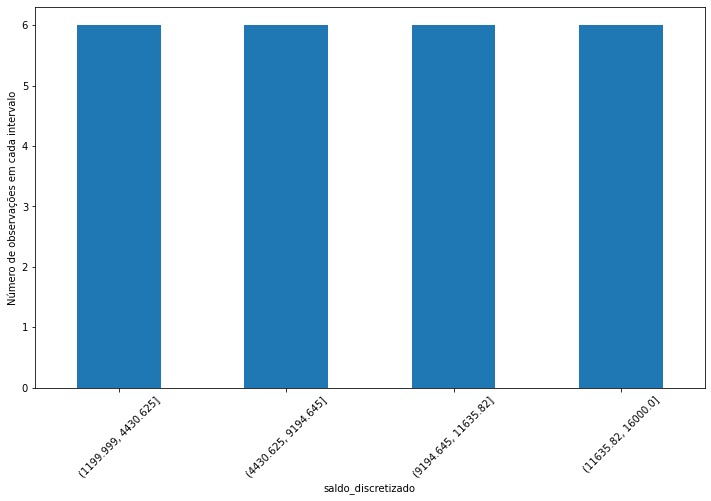

In [ ]:
plt.figure(figsize=(12,7))
dataframe.groupby("saldo_discretizado")["idade"].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Número de observações em cada intervalo')

## Discretização por frequência igual

In [ ]:
sorted(saldo)

[1200.0,
 1298.9,
 1690.01,
 1789.03,
 2432.18,
 2964.03,
 4919.49,
 5000.0,
 5293.05,
 6304.24,
 6409.31,
 8847.02,
 9542.27,
 9734.05,
 10038.05,
 11113.87,
 11118.21,
 11626.03,
 11665.19,
 11684.21,
 12517.09,
 13232.54,
 13546.88,
 16000.0]

In [ ]:
dataframe["saldo_discretizado"], intervalos = pd.qcut(dataframe["saldo"], 4, labels=None, retbins=True)

In [ ]:
dataframe.head()

,nome,idade,saldo,saldo_discretizado
0,Idette,75,9734.05,"(9194.645, 11635.82]"
1,Aura,42,12517.09,"(11635.82, 16000.0]"
2,Else,50,6304.24,"(4430.625, 9194.645]"
3,Justinian,61,11118.21,"(9194.645, 11635.82]"
4,Arin,77,9542.27,"(9194.645, 11635.82]"


In [ ]:
intervalos

array([ 1200.   ,  4430.625,  9194.645, 11635.82 , 16000.   ])

## Discretização utilizando k-means

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
discretizador = KBinsDiscretizer(n_bins=4,encode="ordinal",strategy="kmeans")

In [ ]:
discretizador.fit(dataframe["saldo"].to_frame())

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='kmeans')

In [ ]:
dataframe["saldo_discretizado"] = discretizador.transform(dataframe["saldo"].to_frame())

In [ ]:
dataframe.head()

,nome,idade,saldo,saldo_discretizado
0,Idette,75,9734.05,2.0
1,Aura,42,12517.09,3.0
2,Else,50,6304.24,1.0
3,Justinian,61,11118.21,2.0
4,Arin,77,9542.27,2.0


In [ ]:
discretizador.bin_edges_

array([array([ 1200.        ,  3740.45483333,  8090.88122222, 12210.33597222,
       16000.        ])], dtype=object)

Text(0, 0.5, 'Número de observações em cada intervalo')

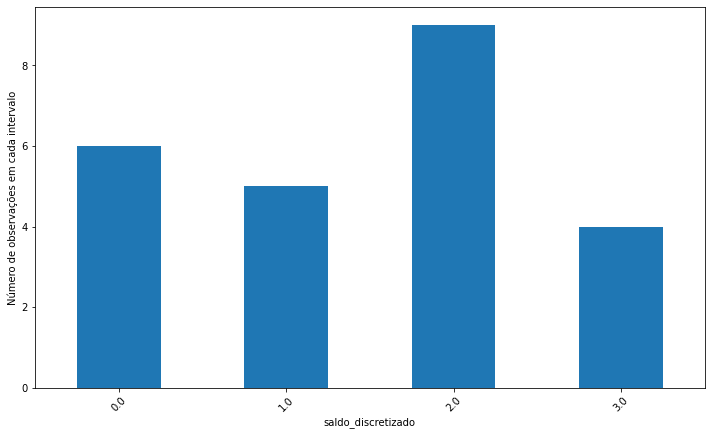

In [ ]:
plt.figure(figsize=(12,7))
dataframe.groupby("saldo_discretizado")["idade"].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Número de observações em cada intervalo')

## Discretização utilizando árvore

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
arvore =DecisionTreeRegressor(max_depth=2, random_state=0)

In [ ]:
arvore.fit(dataframe["saldo"].to_frame(),dataframe["idade"])

DecisionTreeRegressor(max_depth=2, random_state=0)

In [ ]:
dataframe["saldo_discretizado"] = arvore.predict(dataframe["saldo"].to_frame())

In [ ]:
dataframe.head()

,nome,idade,saldo,saldo_discretizado
0,Idette,75,9734.05,61.166667
1,Aura,42,12517.09,31.666667
2,Else,50,6304.24,61.166667
3,Justinian,61,11118.21,61.166667
4,Arin,77,9542.27,61.166667


In [ ]:
dataframe["saldo_discretizado"].unique()

array([61.16666667, 31.66666667, 85.5       , 54.        ])

In [ ]:
pd.concat([X_test, y_test], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')
plt.show()

Text(0, 0.5, 'Idade')

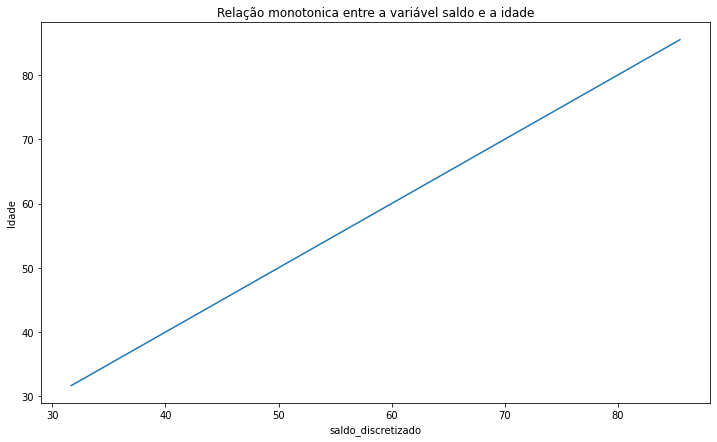

In [ ]:
plt.figure(figsize=(12,7))
dataframe.groupby("saldo_discretizado")["idade"].mean().plot()
plt.title("Relação monotonica entre a variável saldo e a idade")
plt.ylabel("Idade")

Text(0, 0.5, 'Idade')

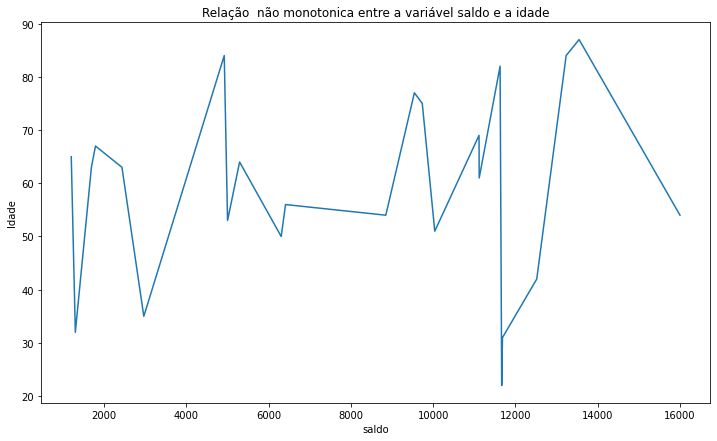

In [ ]:
plt.figure(figsize=(12,7))
dataframe.groupby("saldo")["idade"].mean().plot()
plt.title("Relação  não monotonica entre a variável saldo e a idade")
plt.ylabel("Idade")

## Discretização utilizando árvore com a biblioteca feature-engine

In [ ]:
from feature_engine.discretisation import DecisionTreeDiscretiser

In [ ]:
arvore_ft = DecisionTreeDiscretiser(cv=10,param_grid={"max_depth":[1,2,3]})

In [ ]:
arvore_ft.fit(dataframe["saldo"].to_frame(),dataframe["idade"])

DecisionTreeDiscretiser(cv=10, param_grid={'max_depth': [1, 2, 3]})

In [ ]:
dataframe["saldo_discretizada"] = arvore_ft.transform(dataframe["saldo"].to_frame())

In [ ]:
dataframe.head()

,nome,idade,saldo,saldo_discretizada
0,Idette,75,9734.05,61.166667
1,Aura,42,12517.09,31.666667
2,Else,50,6304.24,61.166667
3,Justinian,61,11118.21,61.166667
4,Arin,77,9542.27,61.166667


In [ ]:
dataframe["saldo_discretizada"].unique()

array([61.16666667, 31.66666667, 85.5       , 54.        ])

Text(0, 0.5, 'Idade')

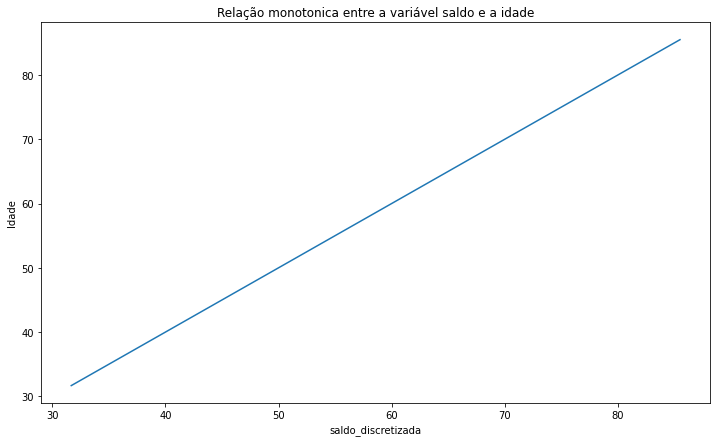

In [ ]:
plt.figure(figsize=(12,7))
dataframe.groupby("saldo_discretizada")["idade"].mean().plot()
plt.title("Relação monotonica entre a variável saldo e a idade")
plt.ylabel("Idade")

# Projeto prático

In [ ]:
dataframe = pd.read_csv("projeto2.csv")

In [ ]:
dataframe.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,892,0,3,"Kelly, Mr. James",male,34.5,0,0.0,330911,7.8292,Q
1,1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0.0,363272,7.0000,S
2,2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0.0,240276,9.6875,Q
3,3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0.0,315154,8.6625,S
4,4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,0.0,3101298,12.2875,S


In [ ]:
dataframe.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0.0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0.0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0.0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0.0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,0.0,3101298,12.2875,S


In [ ]:
dataframe.isnull().head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

In [ ]:

X_treino, X_teste, y_treino, y_teste = train_test_split(dataframe.drop("Survived",axis=1),dataframe["Survived"],test_size=0.3,random_state=0)

In [ ]:
X_treino.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0.0,19877,78.8500,S
381,1273,3,"Foley, Mr. Joseph",male,26.0,0,0.0,330910,7.8792,Q
89,981,2,"Wells, Master. Ralph Lester",male,2.0,1,1.0,29103,23.0000,S
233,1125,3,"Linehan, Mr. Michael",male,27.0,0,0.0,330971,7.8792,Q
191,1083,1,"Salomon, Mr. Abraham L",male,27.0,0,0.0,111163,26.0000,S


In [ ]:
X_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2.0,CA. 2343,69.5500,S
170,1062,3,"Lithman, Mr. Simon",male,27.0,0,0.0,S.O./P.P. 251,7.5500,S
224,1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0.0,PC 17606,27.4458,C
358,1250,3,"O'Keefe, Mr. Patrick",male,27.0,0,0.0,368402,7.7500,Q
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0.0,350026,14.1083,S


In [ ]:
y_treino.head()

96     1
381    0
89     0
233    0
191    0
Name: Survived, dtype: int64

In [ ]:
y_teste.head()

360    0
170    0
224    1
358    0
309    1
Name: Survived, dtype: int64

In [ ]:
discretizador = KBinsDiscretizer(n_bins=4,encode="ordinal",strategy="kmeans")

In [ ]:
# Quero discretizar Fare e Idade
discretizador.fit(X_treino[["Age","Fare"]])

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='kmeans')

In [ ]:
treino_discretizado = discretizador.transform(X_treino[["Age","Fare"]])

In [ ]:
teste_discretizado = discretizador.transform(X_teste[["Age","Fare"]])

In [ ]:
treino_discretizado = pd.DataFrame(treino_discretizado,columns=["Age","Fare"])
teste_discretizado = pd.DataFrame(teste_discretizado,columns=["Age","Fare"])

In [ ]:
treino_discretizado.head()

,Age,Fare
0,3.0,1.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0


In [ ]:
teste_discretizado.head()

,Age,Fare
0,0.0,1.0
1,1.0,0.0
2,3.0,0.0
3,1.0,0.0
4,2.0,0.0


In [ ]:
treino_discretizado["Age"].unique()

array([3., 1., 0., 2.])

In [ ]:
treino_discretizado["Fare"].unique()

array([1., 0., 3., 2.])

In [ ]:
discretizador.bin_edges_

array([array([ 0.17      , 19.25741499, 34.13871001, 50.41116942, 76.        ]),
       array([  0.        ,  44.34356705, 151.61194821, 370.89877   ,
       512.3292    ])], dtype=object)

In [ ]:
discretizador.n_bins_

array([4, 4])

In [ ]:
def compara_proporcao(dataframe1,dataframe2):
    prop1 = dataframe1.value_counts() / len(dataframe1)
    prop2 = dataframe2.value_counts() / len(dataframe2)

    aux = pd.concat([prop1, prop2], axis=1)
    plt.figure(figsize=(12,15))
    aux.columns = ['treino', 'teste']
    aux.plot.bar()
    plt.xticks(rotation=90);
    plt.ylabel('Número de observações por intervalos');

<Figure size 864x648 with 0 Axes>

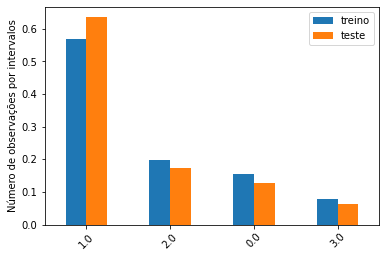

In [ ]:
compara_proporcao(treino_discretizado["Age"],teste_discretizado["Age"])

<Figure size 864x648 with 0 Axes>

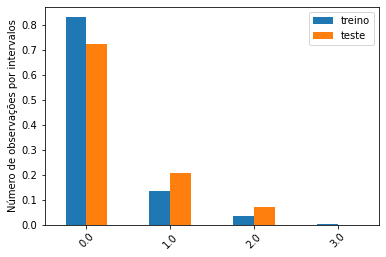

In [ ]:
compara_proporcao(treino_discretizado["Fare"],teste_discretizado["Fare"])

## Discretização via árvore utilizando a biblioteca scikit-learn

In [ ]:
dataframe = pd.read_csv("projeto2.csv")

In [ ]:
dataframe.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(dataframe.drop("Survived",axis=1),dataframe["Survived"],test_size=0.3,random_state=0)

In [ ]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0.0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0.0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0.0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0.0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,0.0,3101298,12.2875,S


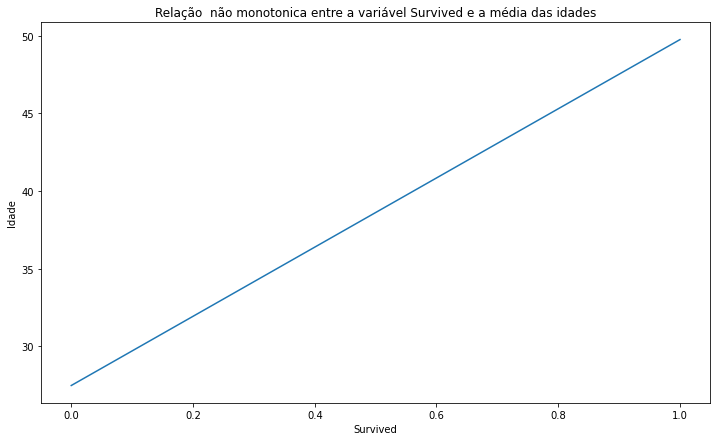

In [ ]:
plt.figure(figsize=(12,7))
dataframe.groupby("Survived")["Fare"].mean().plot()
plt.title("Relação  não monotonica entre a variável Survived e a média das idades")
plt.ylabel("Idade");

In [ ]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeRegressor

arvore_idade = DecisionTreeRegressor(max_depth=4, random_state=0)
arvore_fare = DecisionTreeRegressor(max_depth=4,random_state=0)

In [ ]:
arvore_idade.fit(X_treino["Age"].to_frame(),y_treino)
arvore_fare.fit(X_treino["Age"].to_frame(),y_treino)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [ ]:
X_treino["age_disc"] = arvore.predict(X_treino["Age"].to_frame())
X_treino["fare_disc"]= arvore_fare.predict(X_treino["Fare"].to_frame())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- Age

  warnings.warn(message, FutureWarning)


In [ ]:
X_teste["age_disc"]= arvore.predict(X_teste["Age"].to_frame())
X_teste["fare_disc"]= arvore.predict(X_teste["Fare"].to_frame())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- Age

  warnings.warn(message, FutureWarning)


In [ ]:
X_treino.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_disc,fare_disc
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0.0,19877,78.8500,S,1.000000,1.000000
381,1273,3,"Foley, Mr. Joseph",male,26.0,0,0.0,330910,7.8792,Q,0.307229,0.727273
89,981,2,"Wells, Master. Ralph Lester",male,2.0,1,1.0,29103,23.0000,S,0.500000,0.307229
233,1125,3,"Linehan, Mr. Michael",male,27.0,0,0.0,330971,7.8792,Q,0.307229,0.727273
191,1083,1,"Salomon, Mr. Abraham L",male,27.0,0,0.0,111163,26.0000,S,0.307229,0.307229


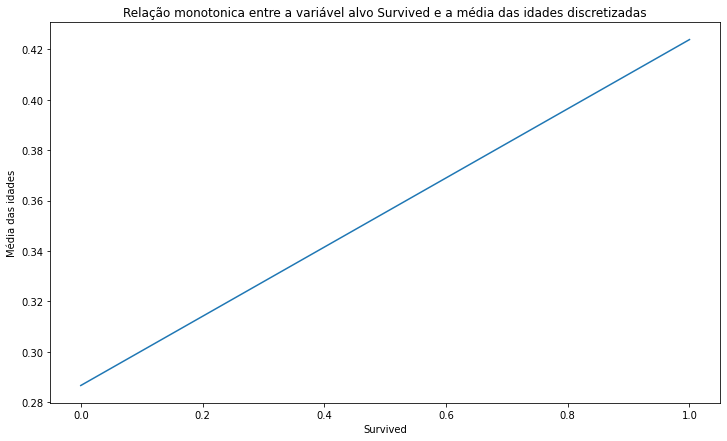

In [ ]:
plt.figure(figsize=(12,7))
pd.concat([X_treino, y_treino], axis=1).groupby(['Survived'])['discretizado'].mean().plot()
plt.title('Relação monotonica entre a variável alvo Survived e a média das idades discretizadas')
plt.ylabel('Média das idades');

## Discretização utilizando a biblioteca feature-engine

In [ ]:
from feature_engine.discretisation import DecisionTreeDiscretiser

arvore_ft = DecisionTreeDiscretiser(variables=['Age', 'Fare'], param_grid={'max_depth': [1,2,3,4]})

In [ ]:
X_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2.0,CA. 2343,69.5500,S
170,1062,3,"Lithman, Mr. Simon",male,27.0,0,0.0,S.O./P.P. 251,7.5500,S
224,1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0.0,PC 17606,27.4458,C
358,1250,3,"O'Keefe, Mr. Patrick",male,27.0,0,0.0,368402,7.7500,Q
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0.0,350026,14.1083,S


In [ ]:
arvore_ft.fit(X_treino,y_treino)

DecisionTreeDiscretiser(param_grid={'max_depth': [1, 2, 3, 4]},
                        variables=['Age', 'Fare'])

In [ ]:
treino_disc = arvore_ft.transform(X_treino)
teste_disc= arvore_ft.transform(X_teste)

In [ ]:
treino_disc.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,0.6000,1,0.0,19877,0.409836,S
381,1273,3,"Foley, Mr. Joseph",male,0.3125,0,0.0,330910,0.232704,Q
89,981,2,"Wells, Master. Ralph Lester",male,0.3125,1,1.0,29103,0.409836,S
233,1125,3,"Linehan, Mr. Michael",male,0.3125,0,0.0,330971,0.232704,Q
191,1083,1,"Salomon, Mr. Abraham L",male,0.3125,0,0.0,111163,0.409836,S


In [ ]:
teste_disc.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
360,1252,3,"Sage, Master. William Henry",male,0.3125,8,2.0,CA. 2343,0.409836,S
170,1062,3,"Lithman, Mr. Simon",male,0.3125,0,0.0,S.O./P.P. 251,0.232704,S
224,1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,0.3125,0,0.0,PC 17606,0.409836,C
358,1250,3,"O'Keefe, Mr. Patrick",male,0.3125,0,0.0,368402,0.232704,Q
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,0.3125,1,0.0,350026,0.232704,S


<Figure size 864x648 with 0 Axes>

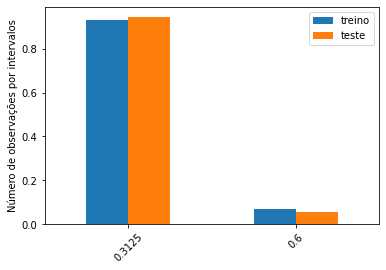

In [ ]:
compara_proporcao(treino_disc["Age"],teste_disc["Age"])

<Figure size 864x648 with 0 Axes>

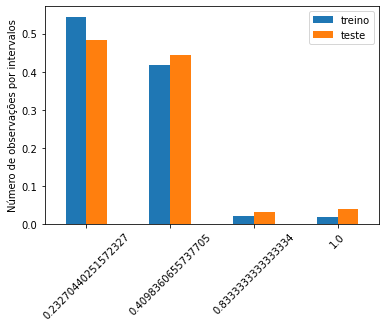

In [ ]:
compara_proporcao(treino_disc["Fare"],teste_disc["Fare"])

<Figure size 864x1080 with 0 Axes>

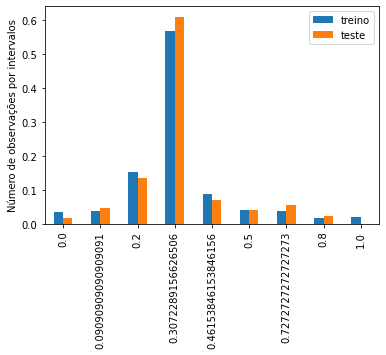

In [ ]:
compara_proporcao(X_treino["age_disc"],X_teste["age_disc"])

<Figure size 864x1080 with 0 Axes>

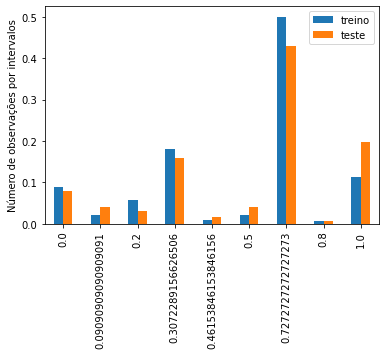

In [ ]:
compara_proporcao(X_treino["fare_disc"],X_teste["fare_disc"])

In [ ]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0.0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0.0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0.0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0.0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,0.0,3101298,12.2875,S
